<a href="https://www.kaggle.com/code/lekeoguntoyinbo/monkeypox-cases-and-infection-rate-analysis?scriptVersionId=102828107" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/monkeypox-dataset-882022-transposed/Monkeypox Dataset(Transposed Aug 822).csv


In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import dates as md
import numpy as np
data = pd.read_csv("../input/monkeypox-dataset-882022-transposed/Monkeypox Dataset(Transposed Aug 822).csv")
data["Dates"] = pd.to_datetime(data["Dates"],infer_datetime_format=True)
data.head()

,Dates,Nigeria,Cameroon,Central African Republic,Republic of Congo,England,Democratic Republic Of The Congo,Portugal,Spain,United States,...,Japan,Guadeloupe,Philippines,Uruguay,Sudan,Bolivia,Montenegro,Cyprus,Lithuania,Guatemala
0,2022-01-31,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2022-02-17,0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2022-02-28,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2022-03-04,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2022-03-31,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# top 20 countries by infection from feb. 2022 to Aug. 2022

tot = data.sum(axis = 0, skipna=True)
top = tot.reset_index(name = "No of infections")
top20 = top.sort_values(by="No of infections", ascending=False)
Top20 = top20.reset_index(drop=True)
Top20cleaned = Top20.rename(columns={"index":"Country"})
Tp20 = Top20cleaned[0:20]
Tp20

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


,Country,No of infections
0,United States,7084
1,Spain,4942
2,Germany,2887
3,England,2551
4,France,2239
5,Brazil,1721
6,Netherlands,957
7,Canada,892
8,Portugal,710
9,Italy,545


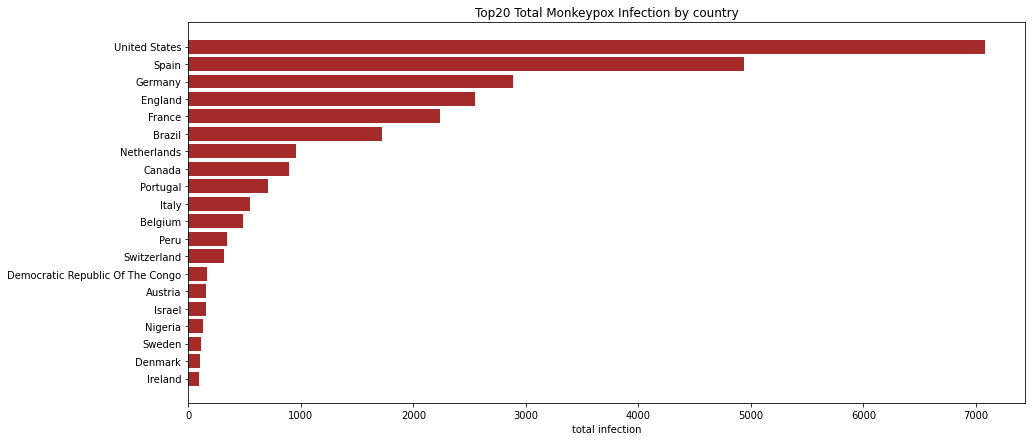

In [4]:
# Total infection chart

x = Tp20["Country"].to_list()
y = Tp20["No of infections"].to_list()

x.reverse()
y.reverse()
plt.figure(figsize=(15,7))
plt.barh(x,y,color="brown")
plt.title("Top20 Total Monkeypox Infection by country")
plt.xlabel("total infection")

plt.show()


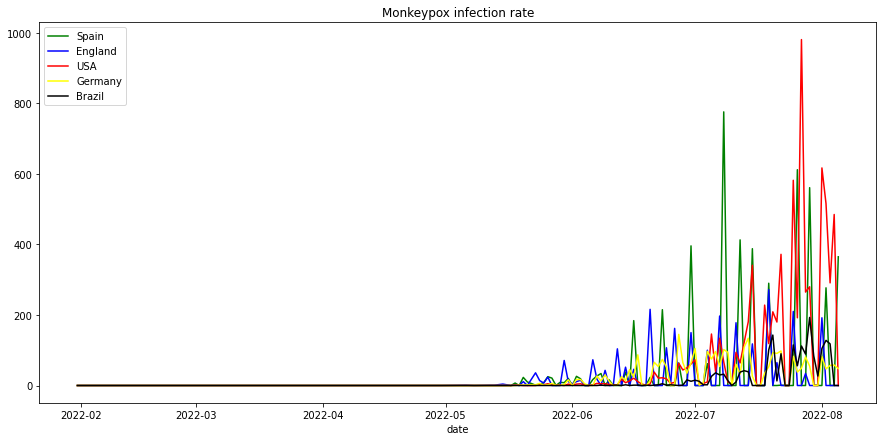

In [5]:
# infection rate in top 5 [USA,Spain,Germany,England and Brazil]

x = data["Dates"]
y = data["Spain"]
z = data["England"]
zz = data["United States"]
aa = data["Germany"]
bb = data["Brazil"]
plt.figure(figsize=(15,7))
plt.plot(x,y,color = "Green", label = "Spain")
plt.plot(x,z,color="Blue", label ="England")
plt.plot(x,zz,color ="Red", label = "USA")
plt.plot(x,aa,color = "Yellow", label = "Germany")
plt.plot(x,bb,color="Black", label ="Brazil")
plt.title("Monkeypox infection rate")
plt.legend()
plt.xlabel("date")
plt.show()
